## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import KernelPCA
from datetime import datetime

#### PCA "from scratch"

In [2]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # X is a dataset
        # calculate mean and normalize
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance matrix
        cov = np.cov(X.T) 
         
        eigenvalues, eigenvectors = np.linalg.eig(cov) 
        # linalg.eig compute the eigenvalues and right eigenvectors of a square array.
        eigenvectors = eigenvectors.T # transpoze
        idxs = np.argsort(eigenvalues)[::-1] # sort indexes descending and apply in eigenvalues/eigenvectors
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # We take first n components
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # Display data
        X = X - self.mean #subtract mean 
        return np.dot(X, self.components.T) # dot product


#### Load dataset

In [3]:
df=pd.read_csv("Dataset.csv")
df

,DATE,sr_NBP,CPI,RB,WN,ZT,PP,PPI,IB,BR,SPD,EURPLN,USDPLN,CHFPLN,WIG20,WIG,WIBOR 3M
0,01/01/2001,19.0,7.399,-348,9.929451,-2.538071,10.7,4.7,6.6,15.7,-99.0,3.79700,4.08000,2.46960,1772.10,17602.90,18.87
1,01/02/2001,19.0,6.629,-434,7.725975,-2.389014,0.0,4.1,6.1,15.9,-99.0,3.71970,4.03750,2.41130,1490.33,15471.50,18.29
2,01/03/2001,17.0,6.214,-897,7.869099,-2.599849,3.3,3.8,5.8,16.1,-99.0,3.59450,4.09030,2.34850,1375.89,14698.90,17.37
3,01/04/2001,17.0,6.638,-781,5.238844,-2.735333,3.8,3.4,6.0,16.0,-99.0,3.52160,3.96180,2.28420,1441.03,15269.00,17.15
4,01/05/2001,17.0,6.943,-658,8.828234,-2.966742,-0.4,2.3,6.5,15.9,-99.0,3.37230,3.98240,2.21870,1467.89,15630.30,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20/09/2019,1.5,2.600,962,6.600000,2.600000,5.6,0.8,2.4,5.1,4.3,4.37094,4.01056,4.01880,2173.29,57320.30,1.72
225,20/10/2019,1.5,2.500,529,5.900000,2.500000,3.7,-0.3,2.4,5.0,4.6,4.26263,3.82239,3.87352,2194.10,57783.02,1.71
226,20/11/2019,1.5,2.600,-999,5.300000,2.600000,1.4,-0.1,2.6,5.1,5.2,4.31466,3.91620,3.91640,2158.94,57502.14,1.71
227,20/12/2019,1.5,-999.000,-999,-999.000000,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,4.25405,3.79380,3.92067,2150.09,57832.88,1.71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      228 non-null    object 
 1   sr_NBP    228 non-null    float64
 2   CPI       228 non-null    float64
 3   RB        228 non-null    object 
 4   WN        228 non-null    float64
 5   ZT        228 non-null    float64
 6   PP        228 non-null    float64
 7   PPI       228 non-null    float64
 8   IB        228 non-null    float64
 9   BR        228 non-null    float64
 10  SPD       228 non-null    float64
 11  EURPLN    228 non-null    float64
 12  USDPLN    228 non-null    float64
 13  CHFPLN    228 non-null    float64
 14  WIG20     228 non-null    float64
 15  WIG       228 non-null    float64
 16  WIBOR 3M  229 non-null    float64
dtypes: float64(15), object(2)
memory usage: 30.5+ KB


In [5]:
df=df.drop(columns=["RB","DATE"])
df=df.drop([227,228])
X=df.values
X

array([[1.90000000e+01, 7.39900000e+00, 9.92945101e+00, ...,
        1.77210000e+03, 1.76029000e+04, 1.88700000e+01],
       [1.90000000e+01, 6.62900000e+00, 7.72597477e+00, ...,
        1.49033000e+03, 1.54715000e+04, 1.82900000e+01],
       [1.70000000e+01, 6.21400000e+00, 7.86909930e+00, ...,
        1.37589000e+03, 1.46989000e+04, 1.73700000e+01],
       ...,
       [1.50000000e+00, 2.60000000e+00, 6.60000000e+00, ...,
        2.17329000e+03, 5.73203000e+04, 1.72000000e+00],
       [1.50000000e+00, 2.50000000e+00, 5.90000000e+00, ...,
        2.19410000e+03, 5.77830200e+04, 1.71000000e+00],
       [1.50000000e+00, 2.60000000e+00, 5.30000000e+00, ...,
        2.15894000e+03, 5.75021400e+04, 1.71000000e+00]])

In [6]:
print(f"Dataset dimension: {X.shape}")

Dataset dimension: (227, 15)


In [7]:
pca3=PCA(3)
pca2=PCA(2)
pca2.fit(df.values)
pca3.fit(df.values)

In [8]:
X_3D=pca3.transform(df.values)
X_2D=pca2.transform(df.values)
print(f"Dataset dimension after PCA3: {X_3D.shape} and after PCA2: {X_2D.shape}.")

Dataset dimension after PCA3: (227, 3) and after PCA2: (227, 2).


## First application: Visualization big datasets

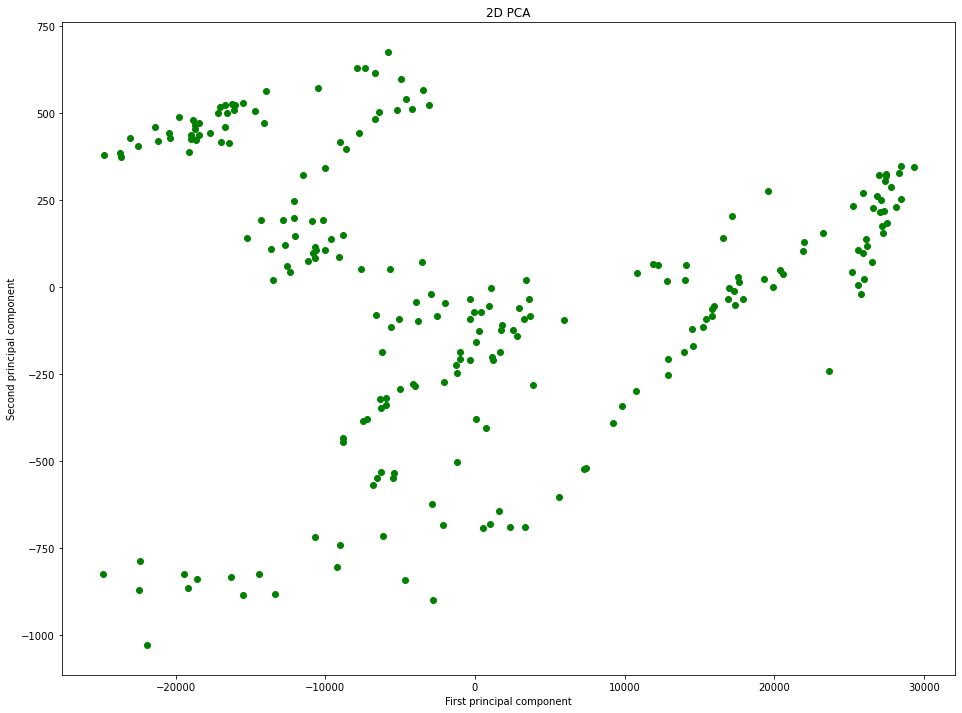

In [9]:
x1 = X_2D[:, 0]
x2 = X_2D[:, 1]

fig = plt.figure(2, figsize=(16,12))
plt.scatter(x1, x2,c='green',cmap='viridis')


plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("2D PCA")
plt.show()

<Figure size 432x288 with 0 Axes>

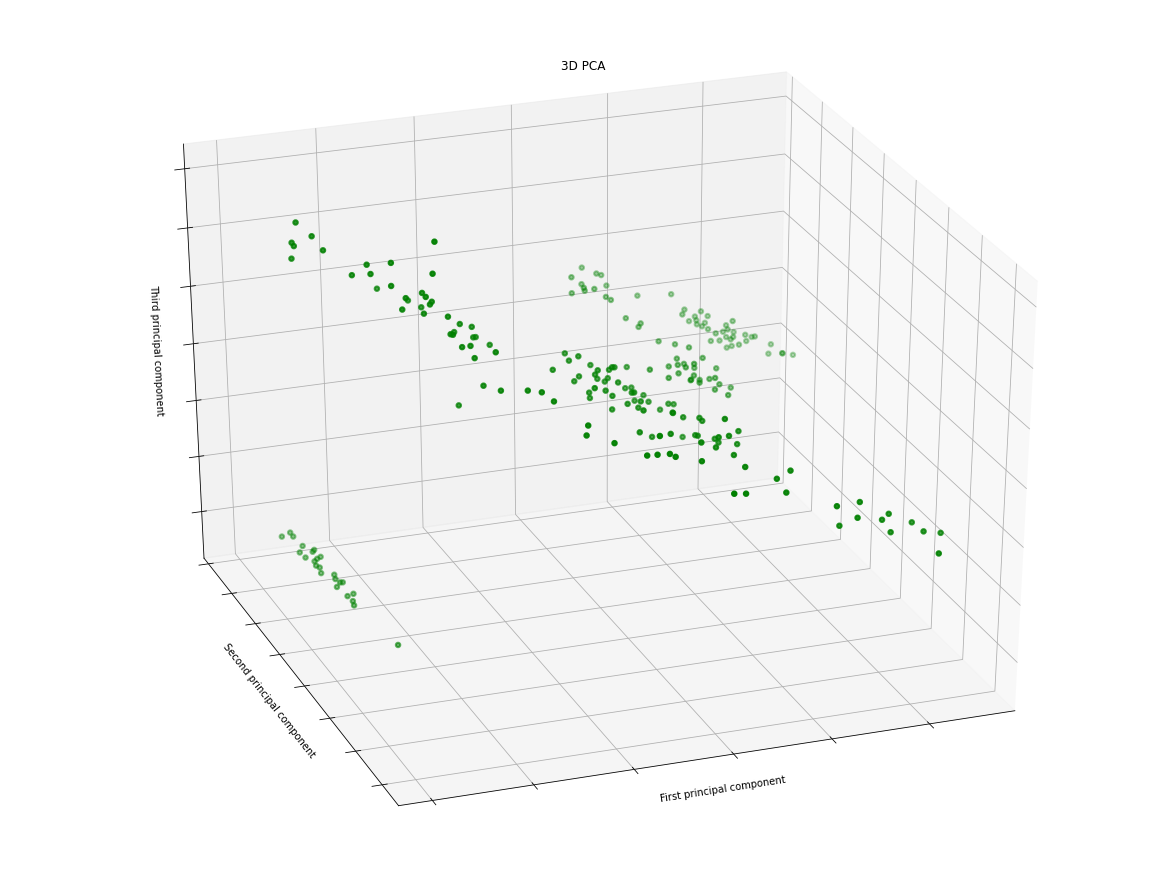

In [10]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(2, figsize=(16,12 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2],c='green',cmap='viridis',linewidths=2)
ax.set_title("3D PCA")
ax.set_xlabel("First principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Second principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Third principal component")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [11]:
principal_df = pd.DataFrame(data = X_3D, 
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df

,principal component 1,principal component 2,principal component 3
0,23625.181191,-240.030343,67.851078
1,25763.839807,-20.072141,62.376665
2,26539.426370,71.926697,59.415654
3,25967.680879,23.330896,60.854563
4,25605.755234,6.959835,62.100746
...,...,...,...
222,-18439.632195,471.284386,5.963944
223,-15505.678039,528.523982,3.122847
224,-16087.305025,507.290434,3.693660
225,-16550.433373,499.894339,4.307934


### Next application: Keep memory

In [12]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

y_train = train['label'].values.astype('int32')
y_test = test['label'].values.astype('int32')

train.drop(['label'], axis=1, inplace=True)
test.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')

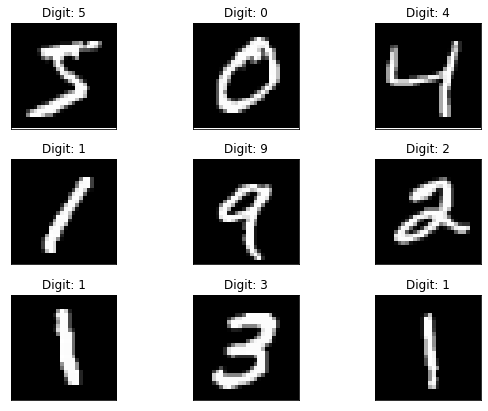

In [13]:
fig = plt.figure(figsize=(8,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

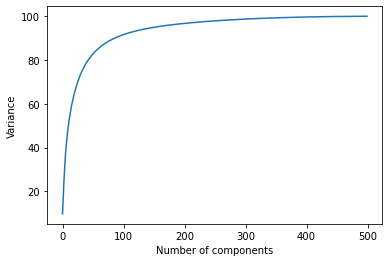

In [14]:
# relationship between variance and number of components

pca = sklearnPCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

In [15]:
NCOMPONENTS = 392 # number of principal components

pca = sklearnPCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
pca_std = np.std(X_pca_train)

print(X_train.shape)
print(X_pca_train.shape)

(60000, 784)
(60000, 392)


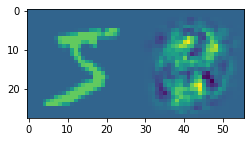

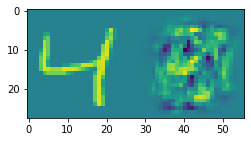

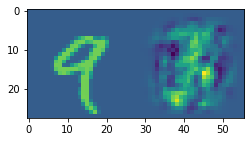

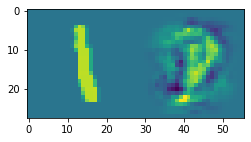

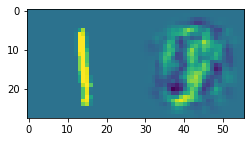

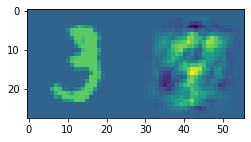

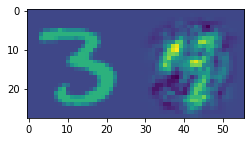

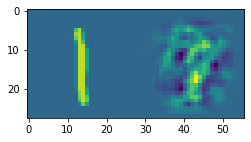

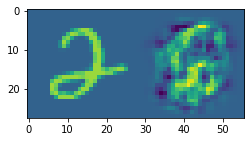

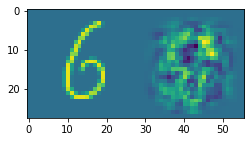

In [16]:
# display comparision between "before" and "after" implementation PCA

inv_pca = pca.inverse_transform(X_pca_train)

for index in range(0,20,2):
    org = X_train[index].reshape(28,28)
    rec = inv_pca[index].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()

#### Kernel PCA 

In the field of multivariate statistics, kernel principal component analysis (kernel PCA) is an extension of principal component analysis (PCA) using techniques of kernel methods. More here [Wiki](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)

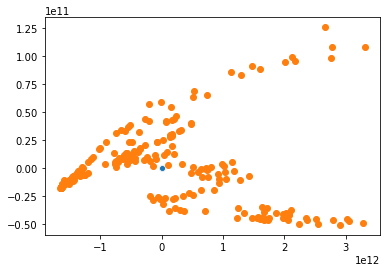

In [17]:
poly_pca = KernelPCA(n_components = 2, kernel="poly")
X_reduced1 = poly_pca.fit_transform(X)

ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.scatter(X_reduced1[:, 0], X_reduced1[:, 1], cmap=plt.cm.hot)

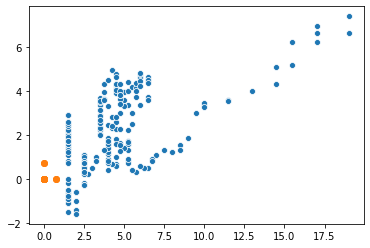

In [18]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf")
X_reduced2 = rbf_pca.fit_transform(X)

ax = sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], cmap=plt.cm.hot)

## Next application: Preserve time in training model

In [19]:
n_samples, input_size = X_train.shape
num_classes = 10

In [20]:
#convert to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.int))
y_test = torch.from_numpy(y_test.astype(np.int))

In [21]:
# we use build-in pytorch to reshape, becasue now it's y_train has only one row. We want to make it a column vector, put each value in one row
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)


#### Model

In [22]:
# model= weights*input + bias
# activation function= sigmoid
class Model(nn.Module):
    
    def __init__(self, input_size, num_classes):
        super(Model,self).__init__()
        #define layer
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,X):
        y_predicted=torch.sigmoid(self.linear(X))
        return y_predicted
model=Model(input_size , num_classes)


# loss function: Cross entropy loss
criterion=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(),lr=0.02)



In [23]:
#traning
epochs=300
for epoch in range(epochs):
    start_time = datetime.now()
    X_train = X_train.reshape(-1, input_size)
    #forward
    y_predicted=model(X_train)
    y_train = y_train.squeeze_()
    y_train = y_train.type(torch.LongTensor)
    loss=criterion(y_predicted,y_train)
    #backward
    loss.backward()
    #update
    optimizer.step()
    #empty gradients, backward method always add gradients to previous value.
    optimizer.zero_grad()
    time_elapsed = datetime.now()  # time for every epoch
    if (epoch) %30 ==0:
        print(f'epoch:{epoch}, loss={loss.item()}, time={time_elapsed}')
    
#evaulation
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls= y_predicted.round() # we have to round to see clearly predicted label
    acc = y_predicted_cls.eq(y_test).sum()/ y_test.shape[0]
    print(f'accuracy={acc}')

epoch:0, loss=2.381470203399658, time=2020-11-18 20:22:24.296590
epoch:30, loss=1.7239335775375366, time=2020-11-18 20:22:27.682786
epoch:60, loss=1.6811286211013794, time=2020-11-18 20:22:31.014917
epoch:90, loss=1.666520595550537, time=2020-11-18 20:22:34.400617
epoch:120, loss=1.6567848920822144, time=2020-11-18 20:22:37.643962
epoch:150, loss=1.651520013809204, time=2020-11-18 20:22:40.846637
epoch:180, loss=1.647287368774414, time=2020-11-18 20:22:44.086019
epoch:210, loss=1.644208312034607, time=2020-11-18 20:22:47.289188
epoch:240, loss=1.6417136192321777, time=2020-11-18 20:22:50.492856
epoch:270, loss=1.640073299407959, time=2020-11-18 20:22:53.687099
accuracy=0.9936000108718872


#### Now we do the same for MNIST dataset after PCA

In [24]:
n_samples, input_size_pca = X_pca_train.shape

In [25]:
X_pca_train = torch.from_numpy(X_pca_train.astype(np.float32))
X_pca_test = torch.from_numpy(X_pca_test.astype(np.float32))

In [26]:
# model= weights*input + bias
# activation function= sigmoid
class Model_PCA(nn.Module):
    
    def __init__(self, input_size_pca , num_classes):
        super(Model_PCA,self).__init__()
        #define layer
        self.linear = nn.Linear(input_size_pca , num_classes)
    
    def forward(self,X):
        y_predicted=torch.sigmoid(self.linear(X))
        return y_predicted
model_pca=Model_PCA(input_size_pca , num_classes)


# loss function: Cross entropy loss
criterion=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model_pca.parameters(),lr=0.02)


In [27]:
#traning
epochs=300
for epoch in range(epochs):
    start_time = datetime.now()
    X_pca_train = X_pca_train.reshape(-1, input_size_pca)
    #forward
    y_predicted_pca=model_pca(X_pca_train)
    y_train = y_train.squeeze_()
    y_train = y_train.type(torch.LongTensor)
    loss_pca=criterion(y_predicted_pca,y_train)
    #backward
    loss_pca.backward()
    #update
    optimizer.step()
    #empty gradients, backward method always add gradients to previous value.
    optimizer.zero_grad()
    time_elapsed = datetime.now()  # time for every epoch
    if (epoch) %30 ==0:
        print(f'epoch:{epoch}, loss={loss_pca.item()}, time={time_elapsed}')
    
#evaulation
with torch.no_grad():
    y_predicted_ = model_pca(X_pca_test)
    y_predicted_cls= y_predicted.round() # we have to round to see clearly predicted label
    acc = y_predicted_cls.eq(y_test).sum()/ y_test.shape[0]
    print(f'accuracy={acc}')

epoch:0, loss=2.4860308170318604, time=2020-11-18 20:23:15.118077
epoch:30, loss=1.9246101379394531, time=2020-11-18 20:23:17.001889
epoch:60, loss=1.8895548582077026, time=2020-11-18 20:23:19.098978
epoch:90, loss=1.867531418800354, time=2020-11-18 20:23:21.149444
epoch:120, loss=1.8522700071334839, time=2020-11-18 20:23:23.354662
epoch:150, loss=1.8413548469543457, time=2020-11-18 20:23:25.487961
epoch:180, loss=1.8331358432769775, time=2020-11-18 20:23:27.629195
epoch:210, loss=1.8262602090835571, time=2020-11-18 20:23:29.800685
epoch:240, loss=1.820700764656067, time=2020-11-18 20:23:32.005902
epoch:270, loss=1.8160170316696167, time=2020-11-18 20:23:34.249314
accuracy=0.9936000108718872


#### Conclusions:
As we can see time for training digit recognizer model is smaller for training set after PCA implementation, but we have less accurate model in some cases. In this example accuracy is the same, but usually we can't say so good informations.